In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ax,figsize=(16,10)
 

In [276]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
data= pd.read_csv('C:/Users/AnupamaRatha/Desktop/Case Study/Credit Card Attrition Data.csv')

In [7]:
#create a copy of the data frame
df1=data.copy()


In [279]:
df1.isnull().sum()

CustomerID                        0
CardType                          0
Product                           0
Balance                           0
BalanceFrequency                  0
Purchases                         0
OneOffPurchases                   0
InstallmentPurchases              0
CashAdvance                       0
PurchaseFrequency                 0
OneOffPurchaseFrequency           0
PurchasesInstallmentsFrequency    0
CashAdvanceFrequency              0
CashAdvanceTransactions           0
PurchasesTransactions             0
CreditLimit                       0
Payments                          0
MinimumPayments                   0
PercentageFullPayment             0
Tenure                            0
Attrited                          0
dtype: int64

Text(0.5,1,'% CardType')

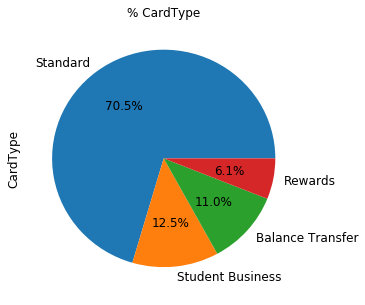

In [152]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
ax = (df1['CardType'].value_counts()*100.0 /len(df1)).plot.pie(autopct='%.1f%%', labels = ['Standard', 'Student Business','Balance Transfer','Rewards'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('CardType',fontsize = 12)
ax.set_title('% CardType', fontsize = 12)

Text(0.5,1,'Product vs Attrited')

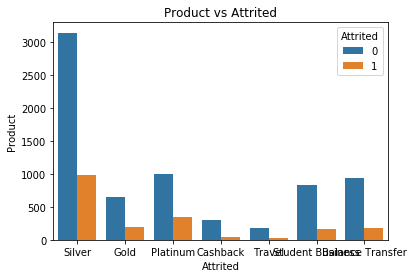

<Figure size 720x396 with 0 Axes>

In [161]:
ax=sns.countplot(x='Product',hue='Attrited',data=df1)
ax.set_ylabel('Product')
ax.set_xlabel('Attrited')
ax.set_title('Product vs Attrited')

Text(0.5,1,'CardType vs Attrited')

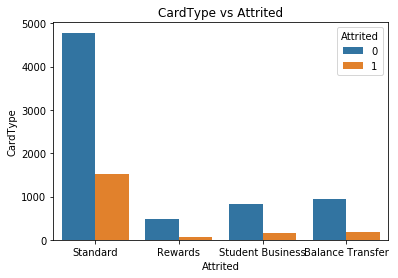

<Figure size 648x324 with 0 Axes>

In [159]:
ax=sns.countplot(x='CardType',hue='Attrited',data=df1)
ax.set_ylabel('CardType')
ax.set_xlabel('Attrited')
plt.figure(figsize=(9,4.5))
ax.set_title('CardType vs Attrited')


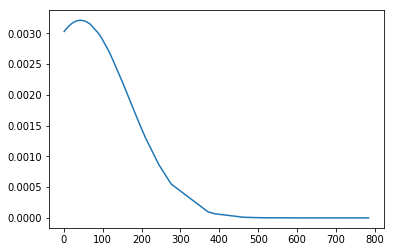

In [35]:
hmean = np.mean(credit_limit)
hstd = np.std(credit_limit)
pdf = stats.norm.pdf(credit_limit, hmean, hstd)
plt.plot(credit_limit, pdf) # including h here is crucial

Training and Building the XGBoost model

In [169]:
#drop the CustomerID
df1.drop(['CustomerID'],axis=1,inplace=True)

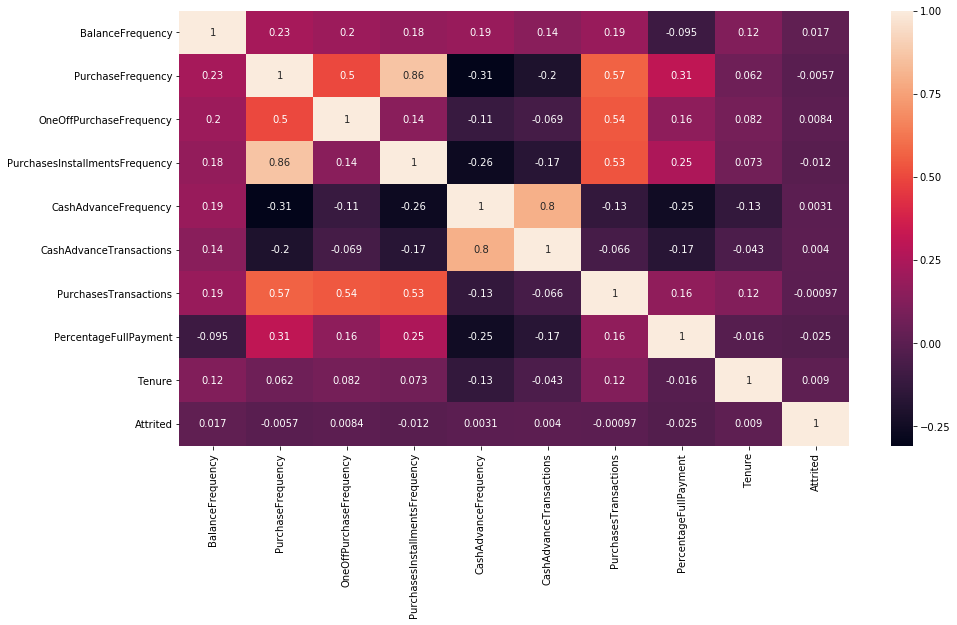

In [170]:
import seaborn as sns
plt.figure(figsize=(15,8))
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [8]:
df1=pd.get_dummies(df1, columns=['Balance','BalanceFrequency','Purchases','OneOffPurchases',
'InstallmentPurchases','CashAdvance','PurchaseFrequency','OneOffPurchaseFrequency','PurchasesInstallmentsFrequency',
'CashAdvanceFrequency','CashAdvanceTransactions','PurchasesTransactions','CreditLimit',
'Payments','MinimumPayments','PercentageFullPayment','Attrited'])
         


In [ ]:
plt.figure(figsize=(15,8))
df1.corr()['Attrited'].sort_values(ascending = False).plot(kind='bar')

In [178]:
df1.head(10)

,CardType,Product,Attrited,Balance_0,Balance_1,"Balance_1,000","Balance_1,001","Balance_1,002","Balance_1,004","Balance_1,005",...,PercentageFullPayment_0.909091,PercentageFullPayment_0.916667,PercentageFullPayment_1.0,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Tenure_11,Tenure_12
0,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Standard,Silver,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Standard,Silver,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:

#there are some redundant features which are to be removed from the model
df1=df1.drop(columns=[ 'CardType','Product'],axis=1)


In [180]:
from sklearn.model_selection import train_test_split
y=df1['Attrited']
X=df1.drop(['Attrited'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train.columns

In [181]:
from sklearn.ensemble import RandomForestClassifier
m1= RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m1.fit(X_train,y_train)
m1.score(X_test,y_test)

0.7687150837988826

**********************************************************

In [208]:
#create a copy of the data frame
df2=data.copy()

In [209]:
df2.isnull().sum()

CustomerID                        0
CardType                          0
Product                           0
Balance                           0
BalanceFrequency                  0
Purchases                         0
OneOffPurchases                   0
InstallmentPurchases              0
CashAdvance                       0
PurchaseFrequency                 0
OneOffPurchaseFrequency           0
PurchasesInstallmentsFrequency    0
CashAdvanceFrequency              0
CashAdvanceTransactions           0
PurchasesTransactions             0
CreditLimit                       0
Payments                          0
MinimumPayments                   0
PercentageFullPayment             0
Tenure                            0
Attrited                          0
dtype: int64

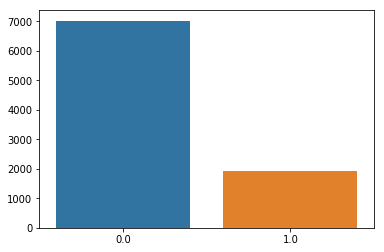

In [210]:
y = df2["Attrited"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [211]:
y_True = df2["Attrited"][df2["Attrited"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df2["Attrited"].shape[0]) * 100 ))


Churn Percentage = 21.53072625698324


In [212]:
 df2.describe()

,Balance,BalanceFrequency,Purchases,OneOffPurchases,InstallmentPurchases,CashAdvance,PurchaseFrequency,OneOffPurchaseFrequency,PurchasesInstallmentsFrequency,CashAdvanceFrequency,CashAdvanceTransactions,PurchasesTransactions,CreditLimit,Payments,MinimumPayments,PercentageFullPayment,Tenure,Attrited
count,8950.00000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,15644.74648,0.877448,10032.081341,5924.396089,4110.695531,9788.712626,0.490261,0.202226,0.364570,0.134970,3.248827,14.709832,44939.472737,17331.437989,8339.833966,0.153602,11.517318,0.215307
std,20815.31786,0.237124,21366.356826,16598.889720,9043.386261,20971.636594,0.401648,0.298548,0.397627,0.200279,6.824647,24.857649,36389.225442,28950.639913,23359.901483,0.292659,1.338331,0.411058
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,1283.25000,0.890000,396.500000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,1.000000,16000.000000,3833.000000,1630.000000,0.000000,12.000000,0.000000
50%,8734.00000,1.000000,3613.000000,380.000000,890.000000,0.000000,0.500000,0.080000,0.170000,0.000000,0.000000,7.000000,30000.000000,8569.000000,2896.500000,0.000000,12.000000,0.000000
75%,20541.50000,1.000000,11101.500000,5773.750000,4686.750000,11138.500000,0.920000,0.300000,0.750000,0.220000,4.000000,17.000000,65000.000000,19011.500000,7887.000000,0.140000,12.000000,0.000000
max,190431.00000,1.000000,490396.000000,407613.000000,225000.000000,471372.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,300000.000000,507215.000000,764062.000000,1.000000,12.000000,1.000000


In [213]:
# State is string and we want discreet integer values
df2['CardType '] = label_encoder.fit_transform(df2['CardType'])
df2['Product'] = label_encoder.fit_transform(df2['Product'])
#print (df['Voice mail plan'][:4])
print (df2.dtypes)

CustomerID                         object
CardType                           object
Product                             int64
Balance                           float64
BalanceFrequency                  float64
Purchases                         float64
OneOffPurchases                   float64
InstallmentPurchases              float64
CashAdvance                       float64
PurchaseFrequency                 float64
OneOffPurchaseFrequency           float64
PurchasesInstallmentsFrequency    float64
CashAdvanceFrequency              float64
CashAdvanceTransactions           float64
PurchasesTransactions             float64
CreditLimit                       float64
Payments                          float64
MinimumPayments                   float64
PercentageFullPayment             float64
Tenure                            float64
Attrited                          float64
CardType                            int64
dtype: object


In [215]:
df2.head (5)

,CustomerID,CardType,Product,Balance,BalanceFrequency,Purchases,OneOffPurchases,InstallmentPurchases,CashAdvance,PurchaseFrequency,...,CashAdvanceFrequency,CashAdvanceTransactions,PurchasesTransactions,CreditLimit,Payments,MinimumPayments,PercentageFullPayment,Tenure,Attrited,CardType
0,C10001,Standard,4,409.0,0.82,954.0,0.0,954.0,0.0,0.17,...,0.00,0.0,2.0,10000.0,2018.0,1395.0,0.00,12.0,0.0,2
1,C10002,Standard,4,32025.0,0.91,0.0,0.0,0.0,64429.0,0.00,...,0.25,4.0,0.0,70000.0,41030.0,10723.0,0.22,12.0,0.0,2
2,C10003,Standard,4,24951.0,1.00,7732.0,7732.0,0.0,0.0,1.00,...,0.00,0.0,12.0,75000.0,6221.0,6273.0,0.00,12.0,0.0,2
3,C10004,Standard,4,16667.0,0.64,14990.0,14990.0,0.0,2058.0,0.08,...,0.08,1.0,1.0,75000.0,0.0,0.0,0.00,12.0,0.0,2
4,C10005,Standard,4,8177.0,1.00,160.0,160.0,0.0,0.0,0.08,...,0.00,0.0,1.0,12000.0,6783.0,2448.0,0.00,12.0,0.0,2


Strip of Response values

In [217]:
y = df2['Attrited'].as_matrix().astype(np.int)
y.size


8950

Strip off Redundant cols

In [222]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
df2.drop(["CustomerID","CardType","Attrited"], axis = 1, inplace=True)


Build Feature Matrix

In [225]:
X = df2.as_matrix().astype(np.float)


In [224]:
X.shape

(8950, 19)

Standardize Feature Matrix values

In [227]:
from sklearn import preprocessing

In [228]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

Stratified Cross Validation - Since the Response values are not balanced


Build Models and Train

In [ ]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
#from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
df1=pd.get_dummies(df1, columns=['Balance','BalanceFrequency','Purchases','OneOffPurchases',
'InstallmentPurchases','CashAdvance','PurchaseFrequency','OneOffPurchaseFrequency','PurchasesInstallmentsFrequency',
'CashAdvanceFrequency','CashAdvanceTransactions','PurchasesTransactions','CreditLimit',
'Payments','MinimumPayments','PercentageFullPayment'])
         

In [250]:
from sklearn.model_selection import train_test_split
y=df1['Attrited']
X=df1.drop(['Attrited'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train.columns

In [251]:
from sklearn.ensemble import RandomForestClassifier
m1= RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m1.fit(X_train,y_train)
m1.score(X_test,y_test)

0.7657355679702048

In [252]:
feature_importances = pd.DataFrame(m1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
BalanceFrequency_1.0,0.027502
OneOffPurchases_0,0.018227
PurchasesInstallmentsFrequency_1.0,0.017586
PurchaseFrequency_1.0,0.017297
OneOffPurchaseFrequency_0.0,0.016933
"CreditLimit_30,000",0.013937
InstallmentPurchases_0,0.013698
CashAdvanceFrequency_0.0,0.013204
CashAdvance_0,0.013003
PurchasesInstallmentsFrequency_0.0,0.012608


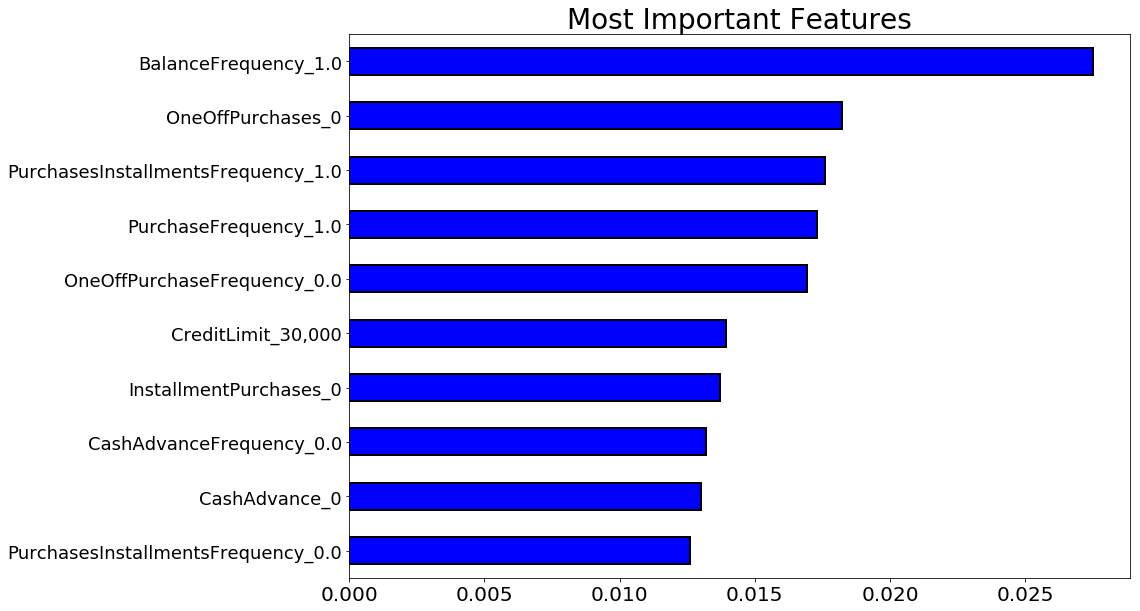

In [257]:

feature_importances.iloc[:10]['importance'].plot.barh(color='b', edgecolor='k',
                                     figsize=(14, 10), linewidth=2)
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(size=20)
plt.yticks(size=18)
plt.title('Most Important Features', size=28);



Train/Test dataset